# Fake Hashtag Word Cloud 

### hashtag_cloud.py, hashtag_cloud_nocovid.py

Packages

In [1]:
import pandas as pd
import numpy as np
import json
import sys
import string
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import nltk
from PIL import Image
import itertools
import altair as alt

Read the json file

In [2]:
data = []
with open('dataset/fakecovid_result_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

Filter all the hashtags and calculate the frequency distribution

In [3]:
index_covid=0
cmt_list_covid = []
for element in data:
    for entity in data[index_covid]['entities']['hashtags']:
        entity['text'] = entity['text'].lower()
        token_covid=entity['text']
        cmt_list_covid.append(token_covid)
        
    index_covid=index_covid+1
    
fdist_covid = dict(nltk.FreqDist(cmt_list_covid))
fdist_sorted = dict(sorted(fdist_covid.items(), key=lambda item: item[1], reverse=True))
#print(fdist_sorted)
out = dict(itertools.islice(fdist_sorted.items(), 15))

df = pd.DataFrame.from_dict(out, orient='index').reset_index()
df = df.rename(columns={'index':'hashtags', 0:'count'})
#print(df)
alt.renderers.enable('altair_viewer',inline=True)


alt.Chart(df, title="Most 15 frequent hashtag in the dataset").mark_bar().encode(
    x='count',
    y='hashtags',
    color=alt.value('blue'),
    opacity=alt.value(0.7)
    
)

alt.Chart(...)

Filter all the hashtags WITHOUT the covid words and calculate the frequency distribution and visualize it

In [4]:
index=0
cmt_list = []
stopwords = ["2019ncov", "pandemic", "covid19", "indiafightscorona", "coronavirus", "sarscov2", "corona", "covid_19", "covid","coronavirusoutbreak","covid2019", "virus", "covid__19", "covidー19", "covid-19", "coronaviruspandemic", "covid19outbreak"]
for element in data:
    for entity in data[index]['entities']['hashtags']:
        entity['text'] = entity['text'].lower()
        entity['text'] = entity['text'].replace(" ", "")
        if entity['text'] not in stopwords:
            token=entity['text']
            cmt_list.append(token)
        
    index=index+1

fdist_hashtag = dict(nltk.FreqDist(cmt_list))
fdist_sorted_hashtag = dict(sorted(fdist_hashtag.items(), key=lambda item: item[1], reverse=True))
out_hashtag = dict(itertools.islice(fdist_sorted_hashtag.items(), 15))

df_hashtag = pd.DataFrame.from_dict(out_hashtag, orient='index').reset_index()
df_hashtag = df_hashtag.rename(columns={'index':'hashtags', 0:'count'})
alt.renderers.enable('altair_viewer',inline=True)


alt.Chart(df_hashtag, title="Most 15 frequent hashtag WITHOUT COVID in the dataset").mark_bar().encode(
    x='count',
    y='hashtags',
    color=alt.value('blue'),
    opacity=alt.value(0.7)
    
)

alt.Chart(...)

Hashtag word cloud (with covid words)

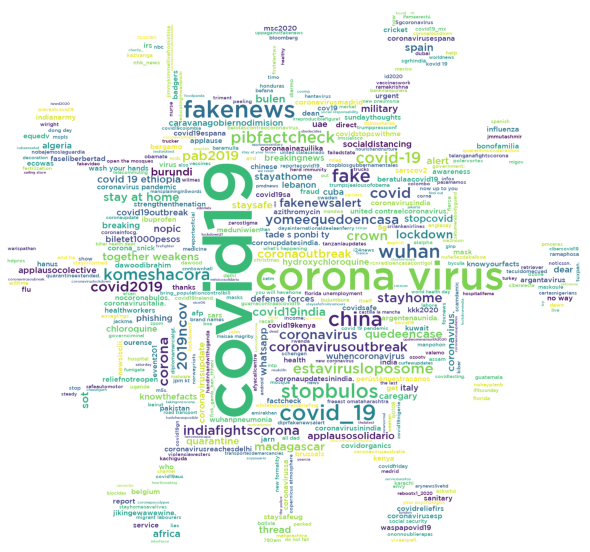

In [5]:
mask_covid= np.array(Image.open('grafici/covid.jpg'))

wordcloud_covid = WordCloud(
                    mask=mask_covid,
                    width=mask_covid.shape[1],
                    height=mask_covid.shape[0],
                    background_color ='white', 
                    min_word_length = 3,
                    max_words=450,
                    font_path = 'grafici/GothamMedium.ttf',
                    min_font_size = 10).generate_from_frequencies(fdist_covid) 

#plot the WordCloud image                        

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_covid) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

Hashtag word cloud (without covid words)

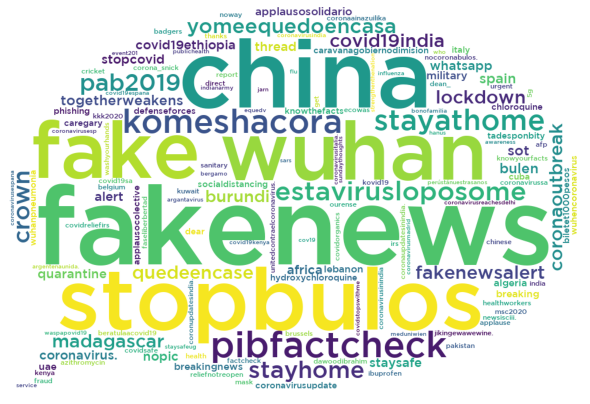

In [6]:
mask_nocovid= np.array(Image.open('grafici/speech_bubble.jpg'))

wordcloud_nocovid = WordCloud(
                        mask=mask_nocovid,
                        width=mask_nocovid.shape[1],
                        height=mask_nocovid.shape[0],
                        background_color ='white', 
                        min_word_length = 3,
                        font_path = 'grafici/GothamMedium.ttf',
                        min_font_size = 10).generate_from_frequencies(fdist_hashtag) 

#plot the WordCloud image                        

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_nocovid) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 